In [30]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

## Reading data from the customer demo table

In [8]:
df1 = pd.read_csv("df_final_demo.csv")
df1

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


## Merging the 2 process tables to one, for better analysis and understanding

In [9]:
df2 = pd.read_csv('df_final_web_data_pt_1.csv')
df3 = pd.read_csv('df_final_web_data_pt_2.csv')
merged_df = pd.concat([df2, df3], ignore_index=True)
merged_df

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


## Convert to one CSV file

In [10]:
merged_df.to_csv('merged_df_final_web_data.csv', index=False)

## Reading data from the variation table

In [11]:
df4 = pd.read_csv("df_final_experiment_clients.csv")
df4

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


## Create tables clearly distinguishing between categorical and numercal variables.

In [12]:
columns_categorical= ['gendr']
columns_numerical= ['clnt_tenure_yr'--continuous,'clnt_tenure_mnth', 'clnt_age'--continuous,'bal','calls_6_mnth','logons_6_mnth' ]

NameError: name 'continuous' is not defined

## Key demographics and behaviors of Vanguard’s online clients.

Who are the primary clients using this online process?Are the primary clients younger or older, new or long-standing?

### 1. Relation between gender and client age

/var/folders/f6/3j2ss2s17kng3g2xrm_hz4sm0000gn/T/ipykernel_14821/318929554.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='gendr', y='clnt_age', palette="coolwarm")


<Axes: xlabel='gendr', ylabel='clnt_age'>

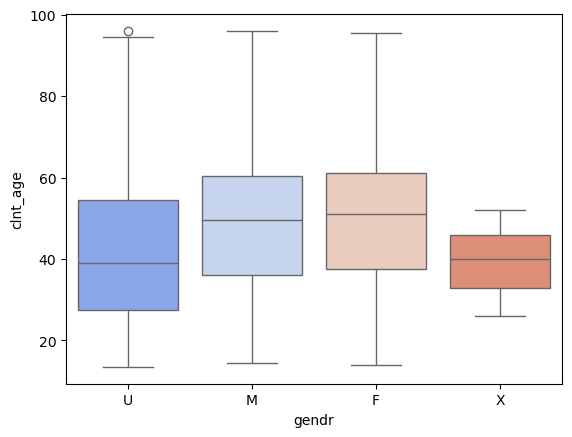

In [ ]:
sns.boxplot(data=df1, x='gendr', y='clnt_age', palette="coolwarm")

### 2. Correlation between tenure year with other factors

In [ ]:
numeric_df = df1.select_dtypes(include=[np.number])

In [ ]:
spearman_correlations= numeric_df.corrwith(df1['clnt_tenure_yr'], method= 'spearman')
spearman_correlation_sorted= spearman_correlations.sort_values(ascending= False)
spearman_correlations_sorted_top = spearman_correlation_sorted[abs(spearman_correlation_sorted) > 0.1]
spearman_correlations_sorted_top

clnt_tenure_yr      1.000000
clnt_tenure_mnth    0.998103
clnt_age            0.300976
bal                 0.273492
num_accts           0.123272
dtype: float64

In [ ]:
correlation_matrix = numeric_df[spearman_correlations_sorted_top.index].corr()

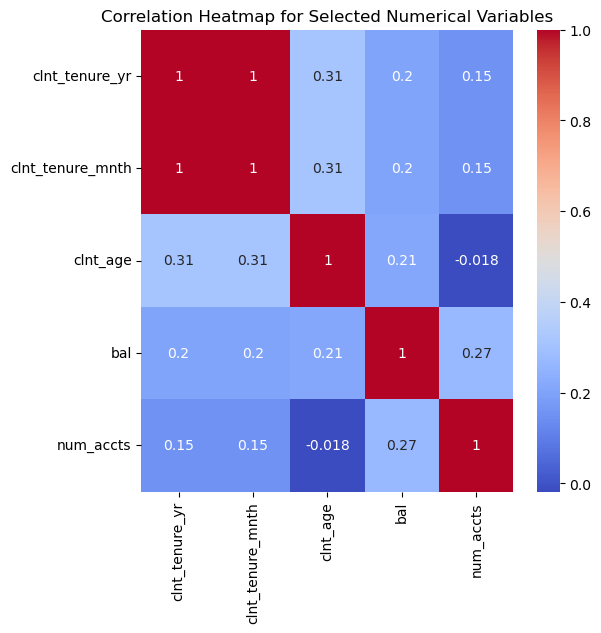

In [ ]:
plt.figure(figsize=(6, 6))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

### 2.1 Relation between tenure year and client age

/var/folders/f6/3j2ss2s17kng3g2xrm_hz4sm0000gn/T/ipykernel_6791/2952791675.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df1, x='clnt_age', y='clnt_tenure_yr', ci=None)


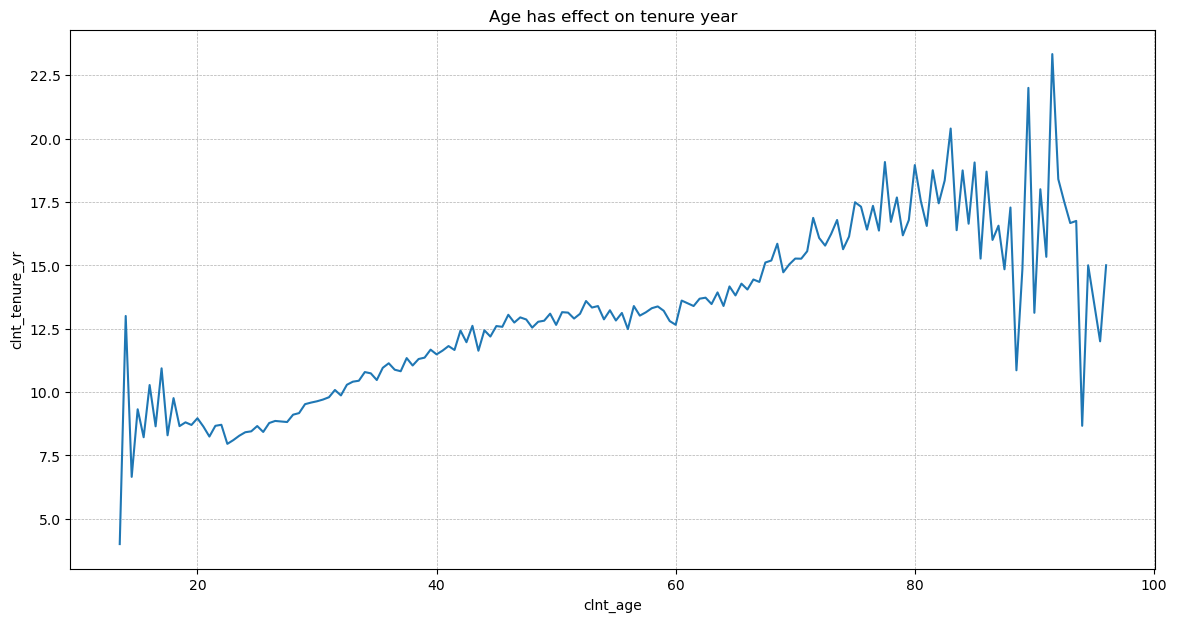

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df1, x='clnt_age', y='clnt_tenure_yr', ci=None)
plt.title('Age has effect on tenure year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

### 2.2 Relation between tenure year and gender

In [ ]:
crosstab_result = pd.crosstab(df1['clnt_tenure_yr'], df1['gendr'])
crosstab_result

gendr,F,M,U,X
clnt_tenure_yr,,,,
2.0,5,10,66,0
3.0,60,49,340,0
4.0,426,405,3856,0
5.0,789,829,5337,0
6.0,575,535,5982,0
7.0,230,283,4442,0
8.0,976,1034,2035,0
9.0,1569,1619,167,2
10.0,1305,1347,123,0


<Axes: xlabel='clnt_tenure_yr'>

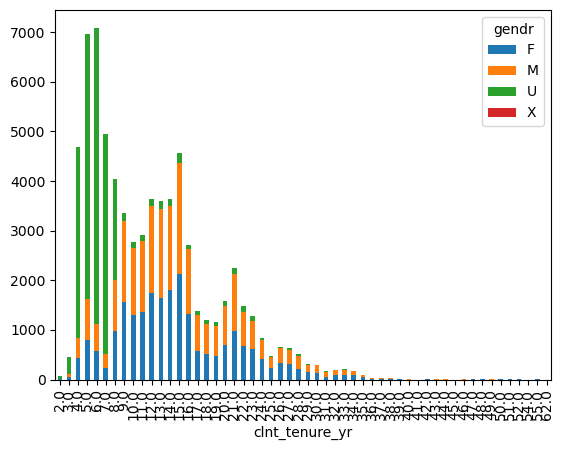

In [ ]:
crosstab_result.plot(kind="bar", stacked=True)

## Merging all 3 dataset into 1

In [25]:
# Reading variation table and web_data table
df4 = pd.read_csv("df_final_experiment_clients.csv")
merged_df = pd.read_csv('merged_df_final_web_data.csv')

#Merging to merged_df_final
merged_df_final = pd.merge(merged_df, df4, on='client_id', how='inner')

#converting to a csv file
merged_df_final.to_csv('merged_df_final.csv', index=False)

# Merging customer_info with merged_df_final
df_final = pd.merge(merged_df_final, df1, on='client_id', how='inner')

#converting to a csv file
df_final.to_csv('df_final.csv', index=False)

## Check null values and clean the dataframe

In [26]:
df_final.isnull().sum()
df_final=df_final.dropna()

In [69]:
client_id_2105948_df = df_final[df_final['client_id'] == 2105948]
client_id_2105948_df


,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
56,2105948,111894218_79248359000,284161492_75966778593_698992,confirm,2017-04-05 14:04:56,Control,6.0,74.0,61.5,U,2.0,39795.28,1.0,4.0
57,2105948,111894218_79248359000,284161492_75966778593_698992,step_3,2017-04-05 14:00:00,Control,6.0,74.0,61.5,U,2.0,39795.28,1.0,4.0
58,2105948,111894218_79248359000,284161492_75966778593_698992,step_2,2017-04-05 13:59:46,Control,6.0,74.0,61.5,U,2.0,39795.28,1.0,4.0
59,2105948,111894218_79248359000,284161492_75966778593_698992,step_3,2017-04-05 13:58:32,Control,6.0,74.0,61.5,U,2.0,39795.28,1.0,4.0
60,2105948,111894218_79248359000,284161492_75966778593_698992,step_2,2017-04-05 13:57:34,Control,6.0,74.0,61.5,U,2.0,39795.28,1.0,4.0
61,2105948,111894218_79248359000,284161492_75966778593_698992,step_1,2017-04-05 13:57:11,Control,6.0,74.0,61.5,U,2.0,39795.28,1.0,4.0
62,2105948,111894218_79248359000,284161492_75966778593_698992,start,2017-04-05 13:44:36,Control,6.0,74.0,61.5,U,2.0,39795.28,1.0,4.0
150,2105948,111894218_79248359000,400183608_67913149333_45420,step_1,2017-04-06 10:20:18,Control,6.0,74.0,61.5,U,2.0,39795.28,1.0,4.0
151,2105948,111894218_79248359000,400183608_67913149333_45420,start,2017-04-06 10:19:49,Control,6.0,74.0,61.5,U,2.0,39795.28,1.0,4.0


Relation between age and variation

In [70]:
# Convert date_time to datetime
df_final['date_time'] = pd.to_datetime(df_final['date_time'])

# Initialize lists to store new dataframe data
new_data = []

# Dictionary to store start times, end times, and last step
client_data = {}

# Iterate over rows to collect start and confirm times, last step, and calculate other needed data
for index, row in df_final.iterrows():
    client_id = row['client_id']
    visit_id = row['visit_id']
    
    if (client_id, visit_id) not in client_data:
        client_data[(client_id, visit_id)] = {
            'start_time': None,
            'confirm_time': None,
            'last_step': None,
            'age': row['clnt_age'],
            'clnt_tenure': f"{int(row['clnt_tenure_yr'])} years, {int(row['clnt_tenure_mnth'])} months"
        }
    
    if row['process_step'] == 'start':
        client_data[(client_id, visit_id)]['start_time'] = row['date_time']
    elif row['process_step'] == 'confirm':
        client_data[(client_id, visit_id)]['confirm_time'] = row['date_time']
    else:
        client_data[(client_id, visit_id)]['last_step'] = row['process_step']

# Process the collected data
for (client_id, visit_id), data in client_data.items():
    start_time = data['start_time']
    confirm_time = data['confirm_time']
    last_step = data['last_step']
    
    if start_time is not None and confirm_time is not None:
        completed = 'yes'
        duration = (confirm_time - start_time).total_seconds()
        last_step = 'confirm'
    else:
        completed = 'no'
        duration = None
    
    new_data.append([client_id, visit_id, completed, duration, data['age'], data['clnt_tenure'], last_step])

# Create new DataFrame
new_df = pd.DataFrame(new_data, columns=['client_id', 'visit_id', 'completed', 'duration', 'age', 'clnt_tenure', 'last_step'])

# Display the new DataFrame
new_df.head(20)

,client_id,visit_id,completed,duration,age,clnt_tenure,last_step
0,9988021,781255054_21935453173_531117,no,NaN,79.0,"5 years, 64 months",step_1
1,8320017,960651974_70596002104_312201,yes,119.0,34.5,"22 years, 274 months",confirm
2,4033851,949661017_22392791362_127391,yes,1492.0,63.5,"12 years, 149 months",confirm
3,1982004,132494692_73738638511_70823,yes,180.0,44.5,"6 years, 80 months",confirm
4,9294070,116640698_27328181095_188045,no,NaN,29.0,"5 years, 70 months",None
5,9466803,812185460_4263902139_352107,no,NaN,27.0,"11 years, 137 months",step_1
6,3170143,758001412_25057963943_219559,yes,222.0,53.5,"21 years, 254 months",confirm
7,6651403,754106292_61370647593_160929,yes,621.0,56.5,"13 years, 162 months",confirm
8,5887227,458489157_53226123692_778999,yes,440.0,32.5,"6 years, 79 months",confirm
9,2105948,284161492_75966778593_698992,yes,1220.0,61.5,"6 years, 74 months",confirm


In [28]:
crosstab_result= pd.crosstab(df_final['clnt_age'], df_final['Variation'])
crosstab_result

Variation,Control,Test
clnt_age,,
17.0,11,8
17.5,180,232
18.0,177,140
18.5,253,456
19.0,200,258
...,...,...
93.5,32,0
94.0,12,13
94.5,0,5


In [32]:
chi2_statistic, chi2_p_value, df, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value,df

(2643.9780569078903, 0.0, 157)

In [33]:
association(crosstab_result, method="cramer")

0.09072866804924334

<Axes: xlabel='clnt_age'>

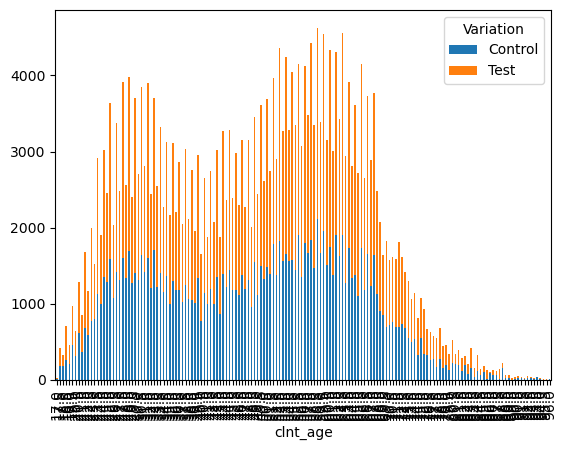

In [42]:
crosstab_result.plot(kind='bar', stacked=True)

More 

In [51]:
category_freq = df_final['Variation'].value_counts()

/var/folders/f6/3j2ss2s17kng3g2xrm_hz4sm0000gn/T/ipykernel_16963/3920422692.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, y='Variation',order=category_freq.index, palette="coolwarm")


<Axes: xlabel='count', ylabel='Variation'>

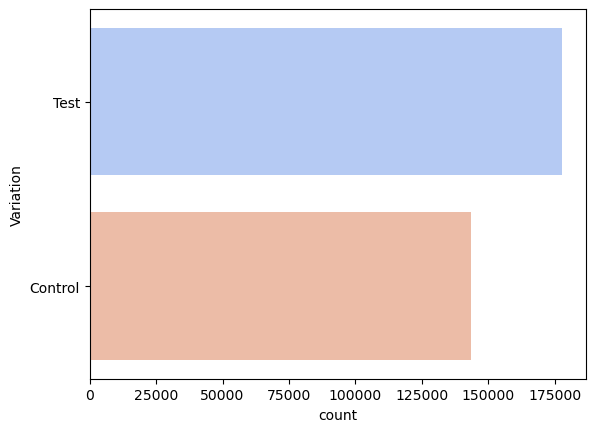

In [53]:
sns.countplot(data=df_final, y='Variation',order=category_freq.index, palette="coolwarm")